In [1]:
import cv2#opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np 

ModuleNotFoundError: No module named 'cv2'

In [2]:
# 导入图像并输出size
img=cv2.imread('./characterTestPattern688.tif')
img.shape


(688, 688, 3)

In [3]:
def pic_show(img):
    # 将图像从 BGR 转换为 RGB，因为 OpenCV 默认使用 BGR 颜色顺序
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 使用 matplotlib 显示图像
    plt.imshow(img_rgb)
    plt.axis('off')  # 不显示坐标轴
    plt.show()


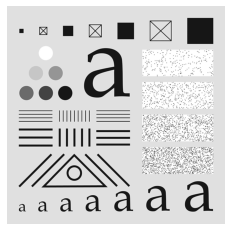

In [4]:
pic_show(img)

进行透视变换

In [5]:
# 获取图像尺寸
height, width = img.shape[:2]
# 定义原始图像的四个角点
pts1 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
# 右上角向左下偏移，左下角向右上偏移
pts2 = np.float32([[0, 0], [width - 30, 200], [30, height - 200], [width, height]])
# 计算透视变换矩阵
M = cv2.getPerspectiveTransform(pts1, pts2)
# 透视变换
img_T= cv2.warpPerspective(img, M, (width, height))

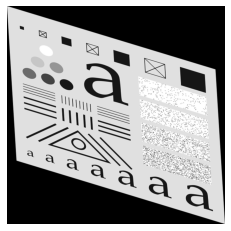

In [6]:
pic_show(img_T)

In [7]:
img_T.shape

(688, 688, 3)

In [17]:
# 用于存储点击的点的坐标
points = []
# 鼠标回调函数，用于记录点击位置
def get_mouse_click(event, x, y, flags, param):

    if event == cv2.EVENT_LBUTTONDOWN:  # 检测到鼠标左键点击
        points.append((x, y))  # 保存坐标
        print(f"Point {len(points)}: ({x}, {y})")
        if len(points) % 4==0:  # 当点击四个点后，自动退出
            cv2.destroyAllWindows()

In [18]:
## 选点函数
def select_points(img):
    cv2.imshow('Select 4 Points', img)
    cv2.setMouseCallback('Select 4 Points', get_mouse_click)
    # 等待用户点击四个点
    cv2.waitKey(0)
    # 输出点击的点坐标
    print("Selected Points:", points)
    # 等待并关闭所有窗口
    cv2.destroyAllWindows()

In [19]:
select_points(img)

Point 1: (39, 72)
Point 2: (650, 36)
Point 3: (39, 629)
Point 4: (573, 580)
Selected Points: [(39, 72), (650, 36), (39, 629), (573, 580)]


In [20]:
select_points(img_T)

Point 5: (39, 61)
Point 6: (625, 215)
Point 7: (66, 458)
Point 8: (574, 578)
Selected Points: [(39, 72), (650, 36), (39, 629), (573, 580), (39, 61), (625, 215), (66, 458), (574, 578)]


In [23]:
# 对应的四个点，分别是左上、右上、左下、右下
pts1 = np.float32([[39, 72], [650, 36], [39, 629], [573, 580]])  # 变换前图像约束点
pts2 = np.float32([[39, 61], [625, 215], [66, 458], [574, 578]])  # 变换后图像约束点
# 计算透视变换矩阵
M = cv2.getPerspectiveTransform(pts2, pts1)
# 对右上角图像进行透视变换，使其与左上角图像对齐
aligned_image = cv2.warpPerspective(img_T, M, (img.shape[1], img.shape[0]))

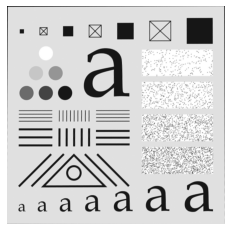

In [24]:
pic_show(aligned_image)

In [25]:

# 计算两幅图像的像素差异
diff_image = cv2.absdiff(img, aligned_image)

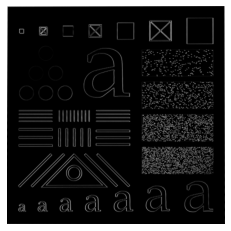

In [26]:
pic_show(diff_image)

In [27]:
cv2.imwrite('image.jpg',img)
cv2.imwrite('image_T.jpg',img_T)
cv2.imwrite('align_image.jpg',aligned_image)
cv2.imwrite('diff_image.jpg',diff_image)


True